In [132]:
reset -fs

In [142]:
%matplotlib inline

import os
import pandas as pd
import yaml
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.dates as mdates


In [134]:
credentials = yaml.load(open(os.path.expanduser('~/.scripts/credentials.yml')))

In [135]:
engine = create_engine(
        'postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**credentials['rds']))


In [136]:
engine.table_names()

['quakes']

In [262]:
pd.read_sql("SELECT isotime, magnitude, longitude, latitude, altitude FROM quakes WHERE magnitude > 5.5 ORDER BY isotime DESC LIMIT 10", engine)


,isotime,magnitude,longitude,latitude,altitude
0,2017-05-09 13:52:10.920,6.8,167.3750,-14.5975,169.00
1,2017-05-09 01:54:14.520,6.0,126.2875,24.4414,10.00
2,2017-05-08 17:00:47.000,6.2,-178.6361,51.7545,10.00
3,2017-05-08 15:47:30.000,5.9,-177.0827,51.1276,22.82
4,2017-05-08 15:31:26.000,5.7,-177.1678,51.0905,17.00
5,2017-05-06 00:16:09.000,5.8,-37.9583,-60.7984,10.00
6,2017-05-05 05:09:35.000,5.8,71.4438,39.4749,10.00
7,2017-05-03 04:47:13.000,5.9,71.4027,39.5100,10.00
8,2017-05-02 15:10:22.000,5.9,-13.9218,-11.7183,10.00
9,2017-05-01 14:18:17.000,6.3,-136.6890,59.7708,20.00


In [138]:
pd.read_sql("SELECT COUNT(*) FROM quakes", engine)

,count
0,480219


In [295]:
tbl = pd.read_sql("SELECT isotime, magnitude, longitude, latitude FROM quakes WHERE (longitude >= -103.029785 and longitude <= -94.416504) and (latitude >= 33.642063 and  latitude <= 37.02887) ORDER BY isotime ASC", engine)
tbl.head()

,isotime,magnitude,longitude,latitude
0,2013-05-22 15:04:12,2.5,-97.662,36.652
1,2013-05-26 02:34:35,2.2,-97.475,35.444
2,2013-05-27 07:58:20,3.2,-96.590,34.075
3,2013-05-29 20:20:05,2.9,-97.004,35.469
4,2013-05-31 04:06:28,2.3,-97.027,35.529


In [353]:
tbl = pd.read_sql("SELECT isotime, magnitude FROM quakes WHERE (longitude >= -103.029785 and longitude <= -94.416504) and (latitude >= 33.642063 and  latitude <= 37.02887)", engine)
tbl.head()

,isotime,magnitude
0,2015-06-10 21:27:00,2.6
1,2015-06-10 19:47:46,2.6
2,2015-06-10 17:54:31,2.6
3,2015-06-10 17:41:15,2.6
4,2015-06-10 13:05:08,3.4


In [354]:
def mag_category(x):
    if x <= 2.5:
        return("0-2.5, not felt")
    elif x > 2.5 and x < 5.5:
        return("2.5-5.5, felt, minor damage")
    else:
        return("5.5 and above, damage")
        
tbl['magnitude']= tbl['magnitude'].apply(lambda x: mag_category(x))

In [355]:
tbl.isotime = mdates.date2num(tbl.isotime.dt.date)
tbl.head()


,isotime,magnitude
0,735759.0,"2.5-5.5, felt, minor damage"
1,735759.0,"2.5-5.5, felt, minor damage"
2,735759.0,"2.5-5.5, felt, minor damage"
3,735759.0,"2.5-5.5, felt, minor damage"
4,735759.0,"2.5-5.5, felt, minor damage"


In [356]:
tbl = tbl.groupby(['isotime','magnitude'])['isotime'].count().unstack('magnitude').fillna(0)

In [362]:
tbl.head()

magnitude,"0-2.5, not felt","2.5-5.5, felt, minor damage","5.5 and above, damage"
isotime,,,
735010.0,1.0,0.0,0.0
735014.0,1.0,0.0,0.0
735015.0,0.0,1.0,0.0
735017.0,0.0,1.0,0.0
735019.0,1.0,1.0,0.0


In [ ]:
fig, ax = tbl.plot(kind='bar', stacked=True)

TypeError: 'AxesSubplot' object is not iterable

AttributeError: 'DataFrame' object has no attribute 'isotime'

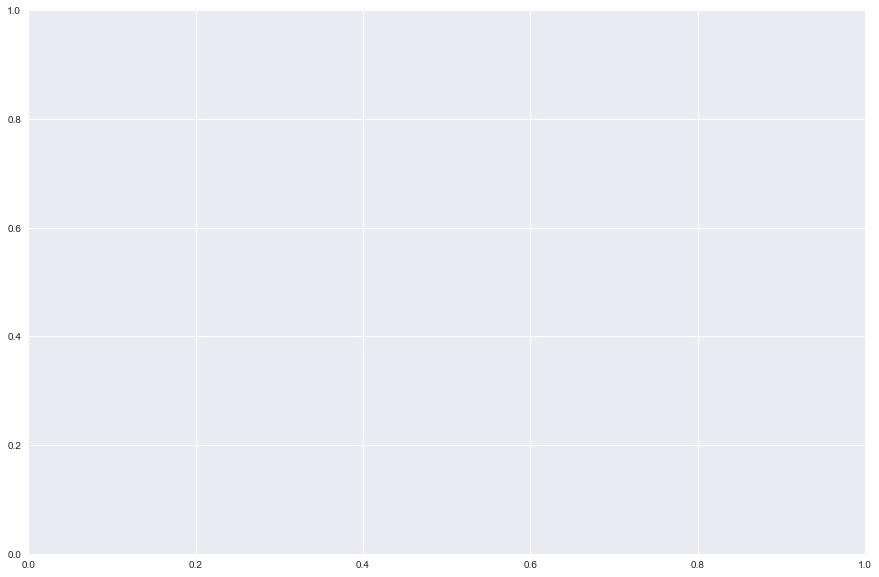

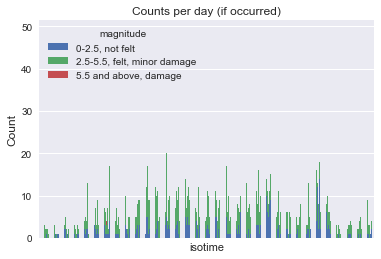

In [361]:
fig, ax = plt.subplots(figsize=(15,10))
ax=tbl.plot(kind='bar', stacked=True)
ax.set_title("Counts per day (if occurred)")
ax.set_ylabel("Count", fontsize=12)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
datemin = datetime.date(tbl.isotime.min().year, 1, 1)
datemax = datetime.date(tbl.isotime.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)
ax.grid(True)
# fig.tight_layout()
# fig.savefig("ok_quakes.png")

In [ ]:
ax.s

TypeError: len() of unsized object

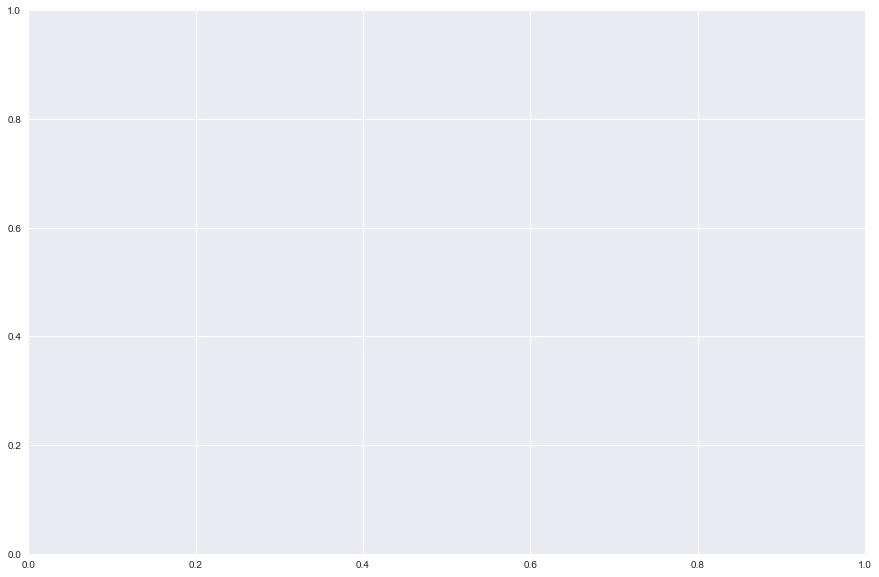

In [335]:
locator = mdates.AutoDateLocator()
years = mdates.YearLocator()   # every year
yearsFmt = mdates.DateFormatter('%d.%m.%y')

fig, ax = plt.subplots(figsize=(15,10))
data = tbl.isotime.dt.date
mpl_data = mdates.date2num(data)
ax.hist(mpl_data, bins=5, stacked=True)
ax.set_title("Counts per day (if occurred)")
ax.set_ylabel("Count", fontsize=12)
# ax.xaxis.set_major_locator(years)
# ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
# datemin = datetime.date(tbl.isotime.min().year, 1, 1)
# datemax = datetime.date(tbl.isotime.max().year + 1, 1, 1)
# ax.set_xlim(datemin, datemax)
ax.grid(True)
fig.tight_layout()
fig.savefig("ok_quakes.png")

In [211]:
data = tbl2.isotime.dt.date
len(data.unique())

1306

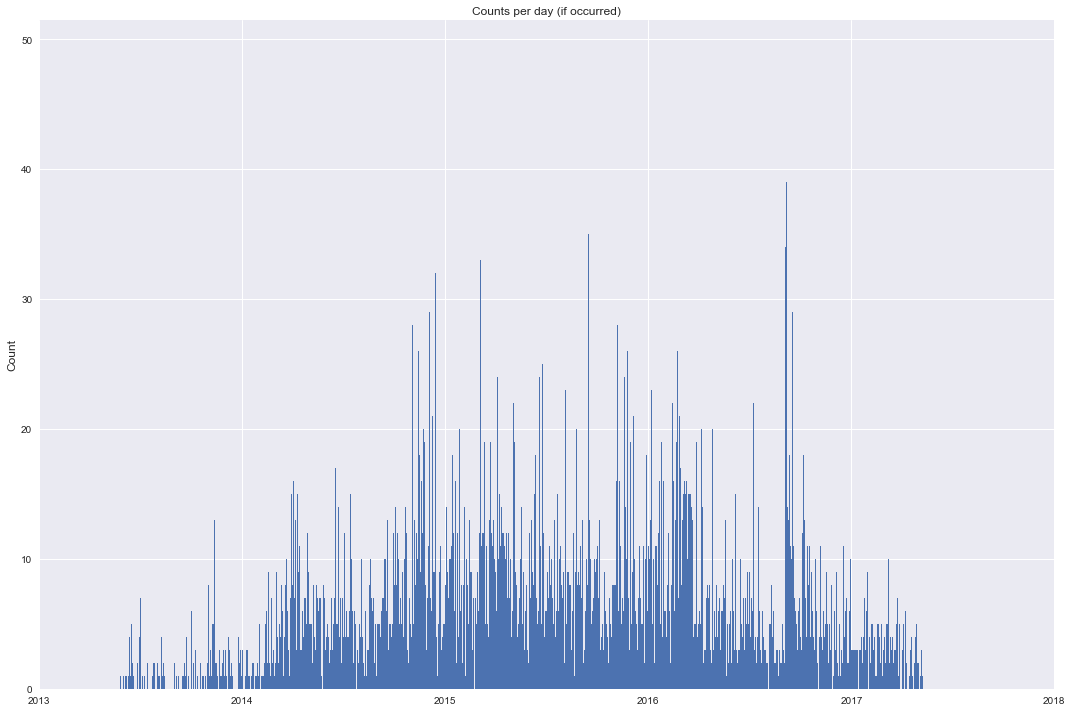

In [256]:
locator = mdates.AutoDateLocator()
years = mdates.YearLocator()   # every year
yearsFmt = mdates.DateFormatter('%d.%m.%y')

fig, ax = plt.subplots(figsize=(15,10))
data = tbl2.isotime.dt.date
mpl_data = mdates.date2num(data)
ax.hist(mpl_data, bins=len(data.unique()))
ax.set_title("Counts per day (if occurred)")
ax.set_ylabel("Count", fontsize=12)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
datemin = datetime.date(tbl2.isotime.min().year, 1, 1)
datemax = datetime.date(tbl2.isotime.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)
ax.grid(True)
fig.tight_layout()
fig.savefig("ok_quakes.png")

In [195]:
tbl2 = pd.read_sql("SELECT isotime FROM quakes WHERE (longitude >= -103.029785 and longitude <= -94.416504) and (latitude >= 33.642063 and  latitude <= 37.02887)", engine)
tbl2.head()

,isotime
0,2015-06-10 21:27:00
1,2015-06-10 19:47:46
2,2015-06-10 17:54:31
3,2015-06-10 17:41:15
4,2015-06-10 13:05:08


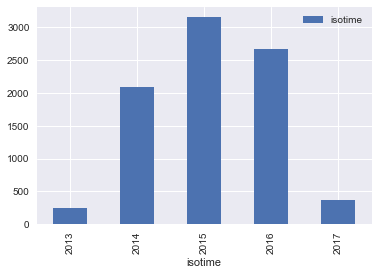

In [217]:
tbl2.groupby(tbl2.isotime.dt.year).count().plot(kind='bar')

In [259]:
tbl3 = pd.read_sql("SELECT magnitude FROM quakes WHERE (longitude >= -103.029785 and longitude <= -94.416504) and (latitude >= 33.642063 and  latitude <= 37.02887)", engine)
tbl3 = tbl3.dropna()
tbl3.head()

,magnitude
0,2.6
1,2.6
2,2.6
3,2.6
4,3.4


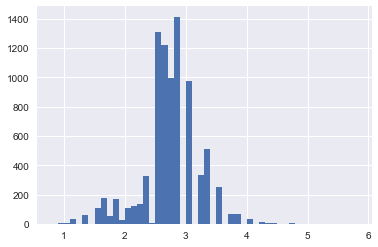

In [261]:
fig1 = plt.gcf()
plt.hist(x="magnitude", data=tbl3, bins=50)
# plt.savefig("oklahoma_quakes.png")
fig1.savefig("oklahoma_quakes.png")

In [96]:
tbl.groupby(["month_year"]).count()

,isotime,magnitude,longitude,latitude
month_year,,,,
2013.10,34,34,34,34
2013.11,72,72,72,72
2013.12,50,50,50,50
2013.5,6,6,6,6
2013.6,30,30,30,30
2013.7,22,22,22,22
2013.8,13,13,13,13
2013.9,18,18,18,18
2014.1,44,44,44,44
